<h2 align="center" > Credit Card Premiums Prediction </h2>

### Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

<h2 align="center" > Load Datasets </h2>

In [2]:
df = pd.read_excel("premiums.xlsx")
df.shape

(50000, 13)

In [3]:
### print some few rows of the data sets 
print("some few rows of datasets")
df.head(4)

some few rows of datasets


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303


<h2 align="center" > Data Cleaning & EDA </h2>

### Handle Missing Values

In [4]:
df.isnull().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [6]:
df.isnull().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

### Handling Duplicates 

In [ ]:
df.duplicated().sum()

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Baisc anlysis 

In [8]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


### Data cleaning Number Of Dependants

In [9]:
df[df['Number Of Dependants']<0]['Number Of Dependants'].unique()

array([-3, -1])

In [10]:
df['Number Of Dependants'] = df['Number Of Dependants'].abs()

In [11]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

### Box Plot for Numeric columns 

In [12]:
Numeric_columns = df.select_dtypes(["float" , "int"]).columns
Numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

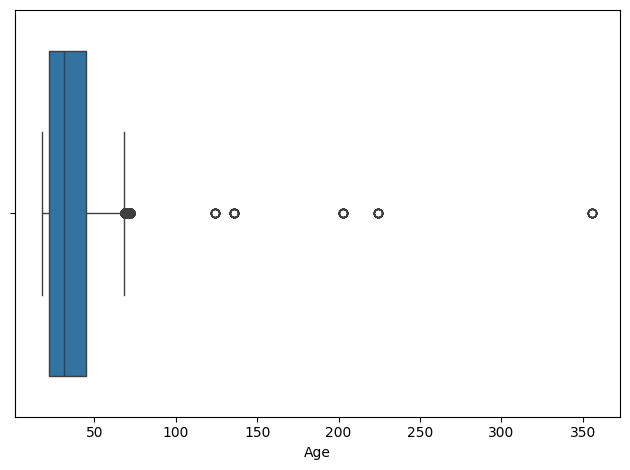

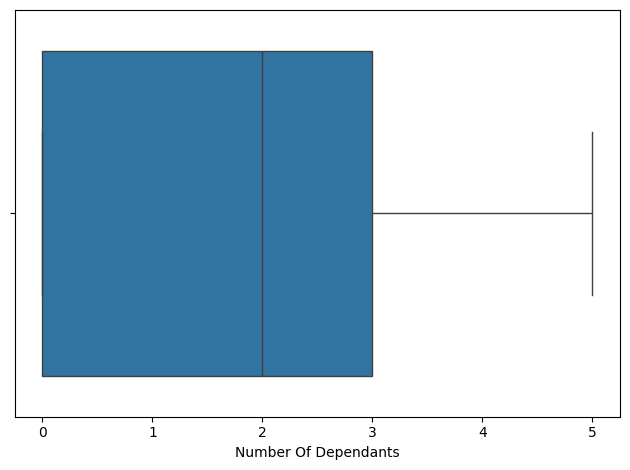

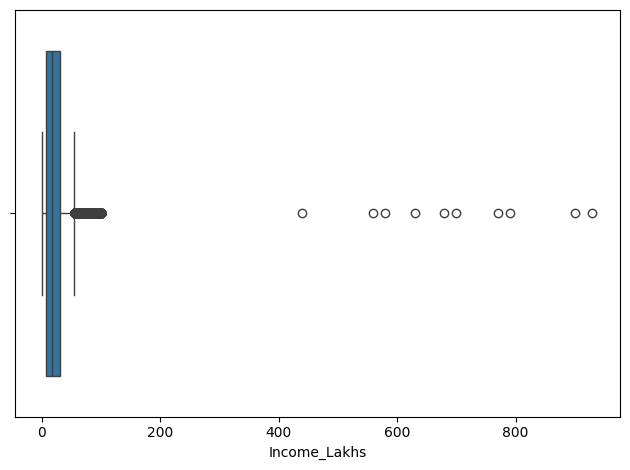

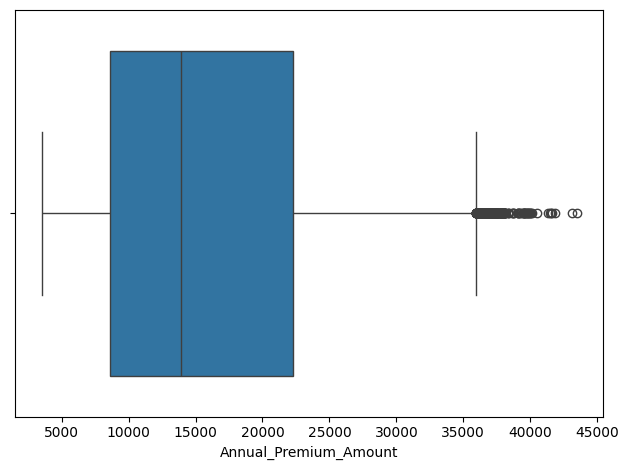

In [13]:
for col in Numeric_columns : 
    sns.boxplot(x=df[col] , whis=1.0)
    plt.tight_layout()
    plt.show()

#### Box plots for numeric columns

### Outlier Treatment: Age Column

In [15]:
df[df["Age"]>100]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
114,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
786,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
1298,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
1456,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
1470,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913
1773,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762
3658,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402
4246,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254
5699,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265
5951,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127


In [17]:
df[df["Age"]>100]["Age"].unique()

array([224, 124, 136, 203, 356])

In [18]:
df[df["Age"]<100]["Age"].unique()

array([26, 29, 49, 30, 18, 56, 33, 43, 59, 22, 21, 46, 68, 60, 27, 25, 36,
       20, 28, 32, 19, 55, 35, 52, 40, 23, 50, 41, 67, 37, 24, 34, 54, 42,
       45, 44, 57, 38, 31, 58, 48, 51, 47, 39, 53, 66, 64, 65, 62, 61, 70,
       72, 69, 71, 63])

In [41]:
df1 = df[df.Age<=100].copy()
df1.Age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: Age, dtype: float64

### Outlier Treatment: Income Column

In [28]:
def get_low_upp(col) :
    Q1 , Q3 = col.quantile([0.25 , 0.75])
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR
    return lower_bound , Upper_bound

lower , upper = get_low_upp(df1["Income_Lakhs"])
lower , upper 
    

(-29.0, 67.0)

In [42]:
df1[df1.Income_Lakhs > upper].shape

(3559, 13)

In [34]:
quantile_threshold = df1.Income_Lakhs.quantile(0.999)
quantile_threshold 

np.float64(100.0)

In [36]:
df1[df1.Income_Lakhs > quantile_threshold].shape

(10, 13)

In [40]:
df_2 = df1[df1.Income_Lakhs <= quantile_threshold].copy()
df_2.shape

(49908, 13)

In [39]:
df_2.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


### Distributing income using histogram 

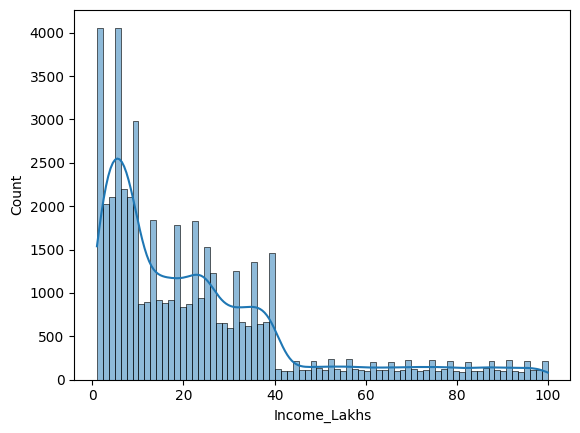

In [45]:
sns.histplot(df_2.Income_Lakhs , kde=True)
plt.show()

### Distributing all the numeric_columns

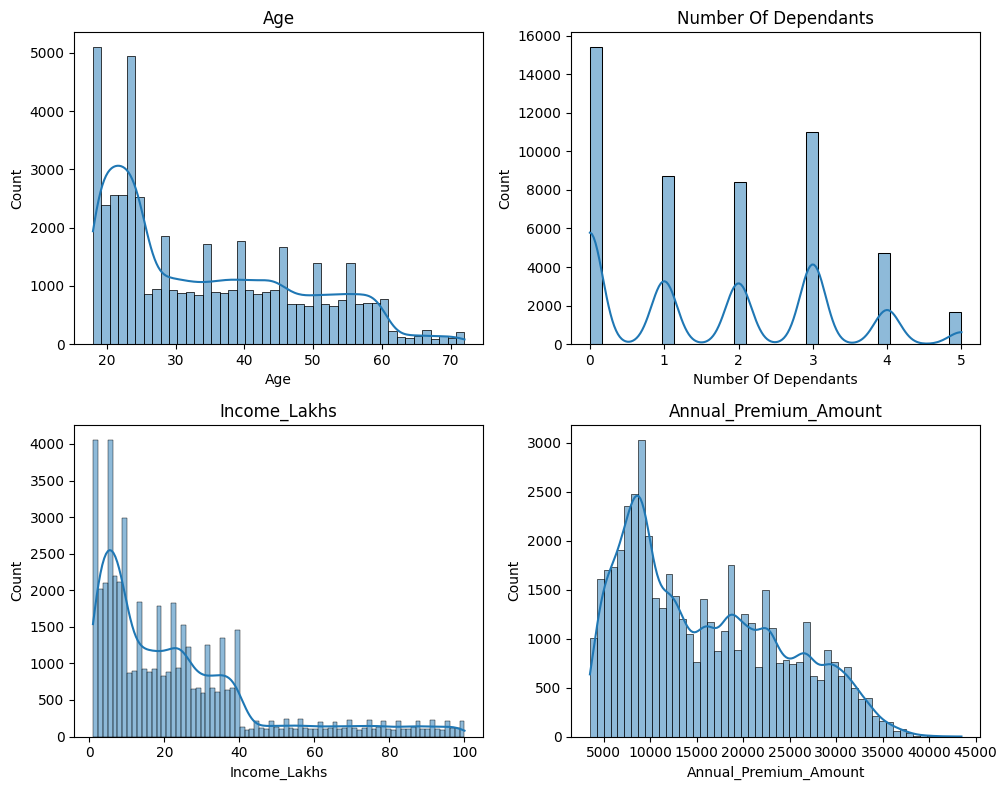

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i , columns in enumerate(Numeric_columns) :
    ax = axs[i//2, i%2]
    sns.histplot(df_2[columns], kde=True, ax=ax)
    ax.set_title(columns)
plt.tight_layout()
plt.show()

### scatter plot compare two colums 

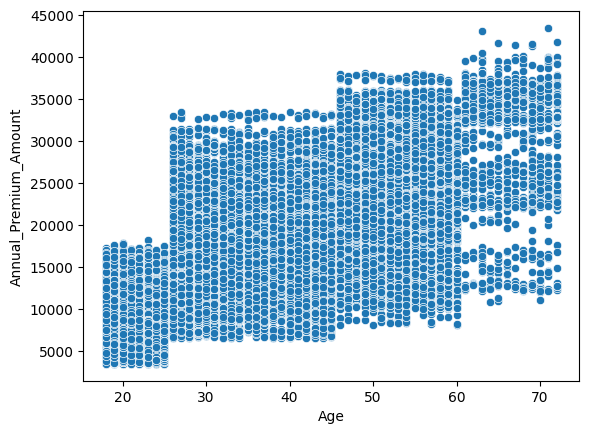

In [69]:
sns.scatterplot(df_2 , x="Age" , y="Annual_Premium_Amount")
plt.show()

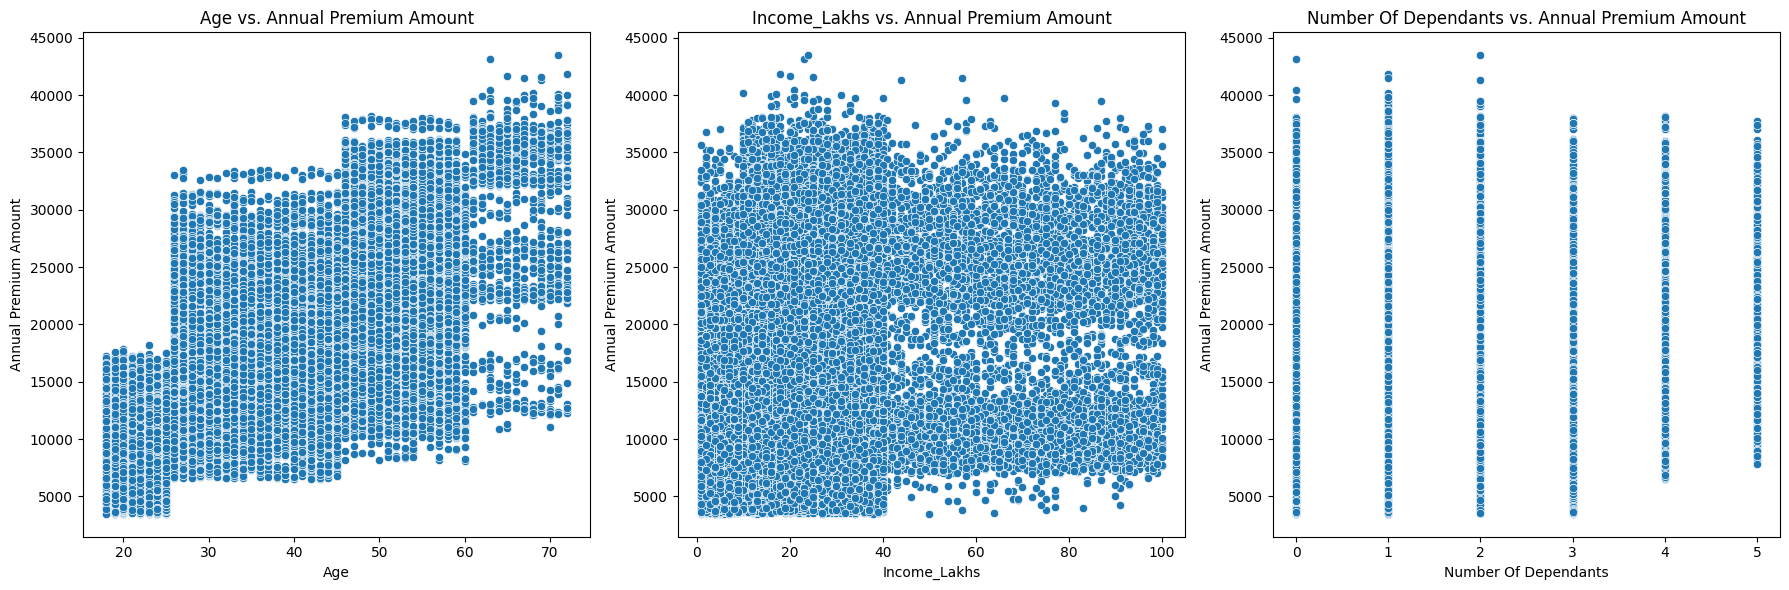

In [74]:
numeric_features = ['Age', 'Income_Lakhs', 'Number Of Dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df_2[column], y=df_2['Annual_Premium_Amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## 2. Categorical Columns